# Importing libraries

In [1]:
import sys
from tqdm import tqdm   
import numpy as np
from iminuit import Minuit
import json
import h5py as h5
from getdist import plots, MCSamples
import matplotlib as mpl
%matplotlib inline

# Define global rcParams settings
mpl.rcParams.update({
    # TICK SETTINGS
    'xtick.direction': 'inout',
    'ytick.direction': 'inout',
    'xtick.major.size': 4,      # major tick size in points
    'xtick.major.width': 1,     # major tick width in points
    'ytick.major.size': 4,      # major tick size in points
    'ytick.major.width': 1,     # major tick width in points

    # GRID SETTINGS
    'axes.grid': True,
    'grid.color': 'grey',
    'grid.linestyle': '-',
    'grid.linewidth': 0.7,
    'grid.alpha': 0.2,

    # LEGEND SETTINGS
    'legend.fancybox': True,
    'legend.facecolor': 'white',
    'legend.framealpha': 0.5,
    'legend.edgecolor': 'grey',

    # FIGURE & SUBPLOT SETTINGS
    'figure.autolayout': False,
    'figure.frameon': True,
    'figure.subplot.left': 0.08,
    'figure.subplot.right': 0.96,

    # LINE SETTINGS
    'lines.linewidth': 1.5,

    # AXES SETTINGS
    'axes.facecolor': 'white',
    'axes.edgecolor': 'black',
    'axes.formatter.use_mathtext': True,  # use math text for scientific notation
    'axes.linewidth': 1.0,
    'axes.labelcolor': 'black',
    'axes.labelsize': 16,

    # FONT SETTINGS
    'font.family': 'serif',
    'font.size': 13,

    # TEXT SETTINGS
    'text.color': 'k',
    'text.usetex': False,

    # MATHTEXT SETTINGS
    'mathtext.cal': 'cursive',
    'mathtext.rm': 'serif',
    'mathtext.tt': 'monospace',
    'mathtext.it': 'serif:italic',
    'mathtext.bf': 'serif:italic:bold',
    'mathtext.sf': 'sans_serif',
    'mathtext.fontset': 'dejavusans',
})

tracer_colors = tracer_colors = {
    'DESI_Y1_LRG1': 'orange',
    'DESI_Y1_LRG2': 'orangered',
    'DESI_Y1_LRG3': 'firebrick',
    'DESI_Y1_QSO':  'seagreen',
    'DESI_Y1_ELG1': 'skyblue',
    'DESI_Y1_ELG2': 'steelblue'
}

In [2]:
sys.argv = [
    'main.py',
    '--data_env', 'envs/DATA/BOSS_highz.env',
    '--sampler_env', 'envs/sampler/cpsc_singlepol.env',
    '--mock', '-1',
    '--machine', 'MAC',
    '--reconstruction', 'True',
    '--omega_min', '13.7',
    '--omega_max', '20',
    '--EZMOCK', 'False'
]

from main import *

2025-05-01 18:22:58,723 - main - INFO - Processes: 32
2025-05-01 18:22:58,723 - main - INFO - DATA NGC file: /Users/s2223060/Desktop/LSS_DATA/BOSS/highz/ps1D_BOSS_DR12_NGC_Recon_0.5_0.75_768_0.001_0.4_3500_renorm.dat
2025-05-01 18:22:58,724 - main - INFO - DATA SGC file: /Users/s2223060/Desktop/LSS_DATA/BOSS/highz/ps1D_BOSS_DR12_SGC_Recon_0.5_0.75_768_0.001_0.4_3500_renorm.dat
2025-05-01 18:22:58,724 - main - INFO - COV NGC file: /Users/s2223060/Desktop/LSS_DATA/BOSS/highz/C_997_BOSS_DR12_NGC_z3_0.001.matrix
2025-05-01 18:22:58,724 - main - INFO - COV SGC file: /Users/s2223060/Desktop/LSS_DATA/BOSS/highz/C_1000_BOSS_DR12_SGC_z3_0.001.matrix
2025-05-01 18:22:58,725 - main - INFO - Window function (NGC): /Users/s2223060/Desktop/LSS_DATA/wf/winfunc_BOSS_highz_North.txt
2025-05-01 18:22:58,726 - main - INFO - Window function (SGC): /Users/s2223060/Desktop/LSS_DATA/wf/winfunc_BOSS_highz_South.txt
2025-05-01 18:22:58,727 - main - INFO - linear matter power spectrum: /Users/s2223060/Desktop/p

Text(0, 0.5, '$kP(k)$')

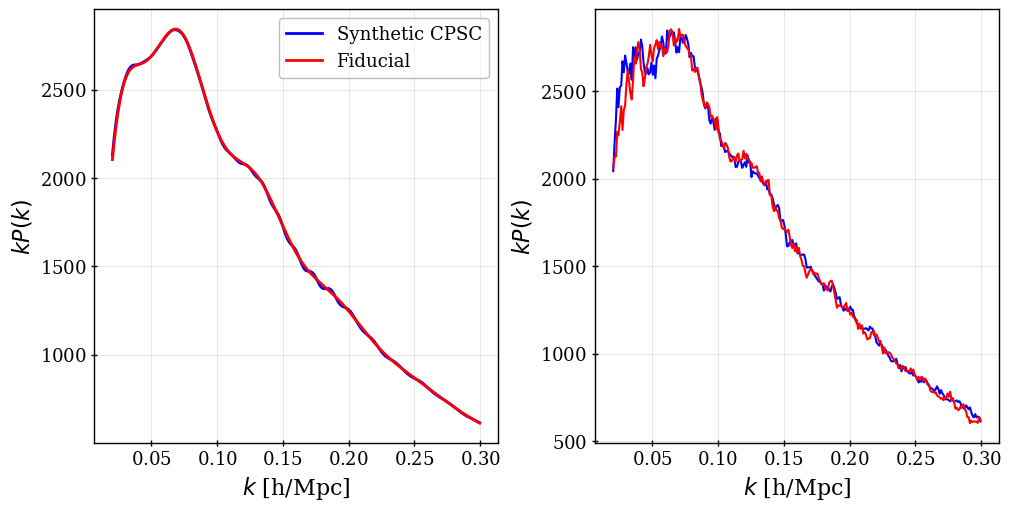

In [3]:
omega = 15
A = 0.02
log10_omega_over_H = 1.9
N = 2*len(k)

PF_guess = np.array([3,2.8,0,0,0,0,0,1,5,3,A,omega,log10_omega_over_H])
BAO_guess = np.array([3,2.8,0,0,0,0,0,1,5,3,0,omega,log10_omega_over_H])

# Inject noise into BAO and PF data
noise_BAO = np.random.multivariate_normal(mean=np.zeros(N), cov=COV)
noise_PF = np.random.multivariate_normal(mean=np.zeros(N), cov=COV)

data_BAO_bare = theory(BAO_guess)
data_PF_bare = theory(PF_guess)

data_BAO = data_BAO_bare + noise_BAO
data_PF = data_PF_bare + noise_PF

mcmc.set_gelman_rubin({
    "N":1,
    "epsilon":10,
    "min_length":10000,
    "convergence_steps":10
})

#fn_wf_ngc = None
#fn_wf_sgc = None

fig, ax = plt.subplots(1,2, figsize=(10, 5), constrained_layout=True)
ax[0].plot(k, k*data_PF_bare[0:len(k)], label='Synthetic CPSC', color='blue', lw = 2)
ax[0].plot(k, k*data_BAO_bare[0:len(k)], label='Fiducial', color='red', lw = 2)
ax[0].legend()
ax[0].set_xlabel(r'$k$ [h/Mpc]')
ax[0].set_ylabel(r'$kP(k)$')

ax[1].plot(k, k*data_PF[0:len(k)], label='Synthetic CPSC', color='blue')
ax[1].plot(k, k*data_BAO[0:len(k)], label='Fiducial', color='red')
ax[1].set_xlabel(r'$k$ [h/Mpc]')
ax[1].set_ylabel(r'$kP(k)$')

In [4]:
mcmc.set_gelman_rubin({
    "N":1,
    "epsilon":10,
    "min_length":10000,
    "convergence_steps":10
})

initial_positions = [mcmc.create_walkers(initialize_walkers,x0 =X0,delta = DELTA) for _ in range(mcmc.gelman_rubin['N'])]

2025-05-01 18:22:59,972 - mcmc_toolkit - INFO - Using the uniform_thin walker positioning


In [5]:
handle_final = 'test_noiseless_synthetic_dp_{}_omega_{}_logm_{}_'.format(A,omega,log10_omega_over_H)+handle
PrimordialFeature_likelihood.set_data(data_PF_bare)
mcmc.run(handle_final, 1, initial_positions, logposterior, gelman_rubin=True, new=True, plots=True)

2025-05-01 18:23:01,424 - mcmc_toolkit - WARNING - The gelman rubin requires 2 or more chains!
2025-05-01 18:23:01,425 - mcmc_toolkit - INFO - You are considering 10000 as the minimum length for the chain
2025-05-01 18:23:01,425 - mcmc_toolkit - INFO - Convergence test happens every 10 steps
2025-05-01 18:23:01,426 - mcmc_toolkit - INFO - Number of walkers: 130
2025-05-01 18:23:01,426 - mcmc_toolkit - INFO - Number of Parameters: 13
2025-05-01 18:23:01,427 - mcmc_toolkit - INFO - Number of parallel chains: 1
2025-05-01 18:23:01,437 - mcmc_toolkit - INFO - Preparing chain 0
2025-05-01 18:23:01,438 - mcmc_toolkit - INFO - Go!


  0%|          | 0/10000 [00:00<?, ?it/s]Traceback (most recent call last):
  File "/opt/anaconda3/envs/velo-env/lib/python3.11/site-packages/emcee/ensemble.py", line 640, in __call__
    return self.f(x, *self.args, **self.kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/s2223060/Desktop/primordial_features/main.py", line 328, in logposterior
    return PrimordialFeature_likelihood.logGaussian(theta)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/s2223060/Desktop/primordial_features/likelihood.py", line 35, in logGaussian
    theory_result = self.theory(theta)
                    ^^^^^^^^^^^^^^^^^^
  File "/Users/s2223060/Desktop/primordial_features/main.py", line 305, in theory
    return np.concatenate((theory_NGC(theta_NGC), theory_SGC(theta_SGC)))
                                                  ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/s2223060/Desktop/primordial_features/main.py", line 293, in <lambda>
    theory_SGC = lambda x: ps_mo

emcee: Exception while calling your likelihood function:
  params: [ 3.44427142e+00  2.82232196e+00 -3.20150461e-04 -9.06570438e-04
 -1.87586337e-04 -4.65845853e-04  6.31026544e-04  9.68690330e-01
  8.58921563e+00  7.92208920e+00  6.87609936e-02  1.73990949e+01
  4.60611524e-01]
  args: []
  kwargs: {}
  exception:


KeyboardInterrupt: 

In [ ]:
handle_final = 'noisy_synthetic_dp_{}_omega_{}_logm_{}_'.format(A,omega,log10_omega_over_H)+handle
PrimordialFeature_likelihood.set_data(data_PF)
mcmc.run(handle_final, 1, initial_positions, logposterior, gelman_rubin=True, new=True, plots=True)

In [ ]:
handle_final = 'noiseless_BAO_dp_{}_omega_{}_logm_{}_'.format(A,omega,log10_omega_over_H)+handle
PrimordialFeature_likelihood.set_data(data_BAO_bare)
mcmc.run(handle_final, 1, initial_positions, logposterior, gelman_rubin=True, new=True, plots=True)


In [ ]:

handle_final = 'noisy_BAO_dp_{}_omega_{}_logm_{}_'.format(A,omega,log10_omega_over_H)+handle
PrimordialFeature_likelihood.set_data(data_BAO)
mcmc.run(handle_final, 1, initial_positions, logposterior, gelman_rubin=True, new=True, plots=True)

In [101]:
# Define files
files = [
    '/Users/s2223060/Desktop/primordial_features/chains/BOSS_highz/DATA/CPSC_singlepol/13.7_20.0/noisy_BAO_dp_0.02_omega_15_logm_1.9_DATA_POST_BOSS_highz_CPSC_singlepol_13.7_20.0_Run_0.h5'
]

# Load and concatenate chains
chains = []
logprobs = []

for f in files:
    with h5.File(f, 'r') as file:
        chains.append(file['mcmc']['chain'][:])
        logprobs.append(file['mcmc']['log_prob'][:])

combined_chain = np.concatenate(chains, axis=0)
combined_chain = combined_chain.reshape(-1, combined_chain.shape[-1])
#combined_chain[:,-2] = np.log10(combined_chain[:,-2])
combined_logprob = np.concatenate(logprobs, axis=0)
combined_logprob = combined_logprob.flatten()

In [ ]:
# Parameter names and labels
names = ["BNGC", "BSGC", "a0", "a1", "a2", "a3", "a4", "alpha", "sigma_nl", "sigma_s", "A", "omega", "log_m_over_h"]
labels = [r'B_{\rm NGC}', r'B_{\rm SGC}', r"a_0", r"a_1", r"a_2", r"a_3", r"a_4", r"\alpha",r"\Sigma_{\rm nl}",r"\Sigma_s", r"dP", r"N_0",r"\log_{10}\,\omega/H"]

# Create combined MCSamples object
samples = MCSamples(
    samples=combined_chain,
    loglikes=-2 * combined_logprob,  # getdist expects -2*logL = chi2
    names=names,
    labels=labels,
    settings={'contours': [0.68, 0.95]},
    ranges = {'log_m_over_h':[0.1,1.9],'A':[0,0.1],'omega':[13.7,20]}
)

# Best-fit point
best_idx = np.argmax(combined_logprob)
best_fit = combined_chain[best_idx]
best_fit_dict = dict(zip(names, best_fit))

print(f"Best-fit As: {best_fit_dict['A']:.5f}")
print(f"Best-fit omega: {best_fit_dict['omega']:.5f}")

In [ ]:
g1 = plots.get_single_plotter(width_inch=6)
g1.triangle_plot(
    samples,
    ['A', 'omega','log_m_over_h'],
    line_args=[{'ls':'-', 'color':tracer_colors['DESI_Y1_QSO']}],
    contour_args=[{'ls':'-', 'color':tracer_colors['DESI_Y1_QSO']}],
    markers={k: best_fit_dict[k] for k in ['omega','A','log_m_over_h']},
    marker_args={'lw': 0.5, 'color':'black'},filled = True
)
g1.add_text('Noisy',-1.25,2.85, font = 'serif',fontsize = 10)
g1.add_text('BAO ',-1.25,2.7, font = 'serif',fontsize = 10)
g1.export('CPSC_fitting_noisy_BAO.pdf')

# Binning the posteriors

In [23]:
# Define files
files = {
    "noiseless_BAO":'/Users/s2223060/Desktop/primordial_features/chains/DESI_Y1_QSO/MOCK_5/sound_singlepol/100.0_500.0/noiseless_BAO_MOCK_5_PRE_DESI_QSO_Y1_sound_singlepol_100.0_500.0_Run_0.h5',
    "noisy_BAO":'/Users/s2223060/Desktop/primordial_features/chains/DESI_Y1_QSO/MOCK_5/sound_singlepol/100.0_500.0/noisy_BAO_MOCK_5_PRE_DESI_QSO_Y1_sound_singlepol_100.0_500.0_Run_0.h5',
    "noiseless_PF":'/Users/s2223060/Desktop/primordial_features/chains/DESI_Y1_QSO/MOCK_5/sound_singlepol/100.0_500.0/noiseless_synthetic_MOCK_5_PRE_DESI_QSO_Y1_sound_singlepol_100.0_500.0_Run_0.h5',
    "noisy_PF":'/Users/s2223060/Desktop/primordial_features/chains/DESI_Y1_QSO/MOCK_5/sound_singlepol/100.0_500.0/noisy_synthetic_MOCK_5_PRE_DESI_QSO_Y1_sound_singlepol_100.0_500.0_Run_0.h5',
}

chains = {}

for key, f in files.items():
    with h5.File(f, 'r') as file:
        chains[key] = file['mcmc']['chain'][:]

In [24]:
freq_edges = np.arange(100, 520, 20)  # edges for binning
freq_centers = 0.5 * (freq_edges[:-1] + freq_edges[1:])

# Prepare storage for results
results = {}

for key, chain in chains.items():
    freq_vals = chain[..., -2]  # frequency values
    param_m3 = chain[..., -3]
    param_m1 = chain[..., -1]

    mean_m3 = []
    std_m3 = []
    mean_m1 = []
    std_m1 = []

    # Loop through bins
    for low, high in zip(freq_edges[:-1], freq_edges[1:]):
        mask = (freq_vals >= low) & (freq_vals < high)
        selected_m3 = param_m3[mask]
        selected_m1 = param_m1[mask]

        mean_m3.append(np.mean(selected_m3) if len(selected_m3) > 0 else np.nan)
        std_m3.append(np.std(selected_m3) if len(selected_m3) > 0 else np.nan)
        mean_m1.append(np.mean(selected_m1) if len(selected_m1) > 0 else np.nan)
        std_m1.append(np.std(selected_m1) if len(selected_m1) > 0 else np.nan)

    results[key] = {
        'freq_centers': freq_centers,
        'mean_m3': np.array(mean_m3),
        'std_m3': np.array(std_m3),
        'mean_m1': np.array(mean_m1),
        'std_m1': np.array(std_m1),
    }

In [ ]:
for x in results.keys():
    plt.figure()
    plt.errorbar(results[x]['freq_centers'],results[x]['mean_m3'],yerr = results[x]['std_m3'])
    plt.title(x)

    plt.figure()
    plt.errorbar(results[x]['freq_centers'],results[x]['mean_m1'],yerr = results[x]['std_m1'])
